In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem Statement
A retail company "ABC Private Limited" wants to understand the customer purchase behaviour (specifically,purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected hogh volume products from last month.
                                 The dataset also contains customer demographics(age,gender,maritalstatus,city_type,demographics(age,gender,marital status,city_type,stay_in_current_city),product details(product_id and product category) and Total purchase_amount from last month.

Now,they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
df_train=pd.read_csv("C:\\Users\\91834\\Downloads\\Black Friday Sale\\Black Friday Sale\\train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_test=pd.read_csv("C:\\Users\\91834\\Downloads\\Black Friday Sale\\Black Friday Sale\\test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
#Append train and test data
df=df_train.append(df_test)
df.head()

C:\Users\91834\AppData\Local\Temp\ipykernel_16000\2808479829.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
df['Purchase'].nunique()

18105

In [6]:
df.shape

(783667, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
df.drop(['User_ID'],axis=1,inplace=True)

In [10]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
df.drop(['Product_ID'],axis=1,inplace=True)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
pd.get_dummies(df['Gender'],drop_first=True)

,M
0,0
1,0
2,0
3,0
4,1
...,...
233594,0
233595,0
233596,0
233597,0


In [13]:
## Handeling Categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,"M":1})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
## Handel Categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [16]:
## Second Technique
##from sklearn import preprocessing
##label_encoder = preprocessing.LabelEncoder()
##df['Age']= label_encoder.fit_transform(df['Age'])
##df['Age'].unique()

In [17]:
##df.head()

In [18]:
## fixing categorical City_category
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [19]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [20]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [21]:
##drop city category feature
df.drop('City_Category',axis=1,inplace=True)

In [22]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [23]:
##Missing Value
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [24]:
##Focus on replacing missing value
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [25]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [26]:
df['Product_Category_2'].mode()[0]

8.0

In [27]:
##Replace the missing vaalue with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [28]:
df['Product_Category_2'].isnull().sum()

0

In [29]:
df.drop(['Product_Category_3'],axis=1,inplace=True)

In [30]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,0,1,10,2,0,3,8.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,1057.0,0,0
4,1,7,16,4+,0,8,8.0,7969.0,0,1


In [31]:
df['Purchase'].value_counts()

7011.0     191
7193.0     188
6855.0     187
6891.0     184
7012.0     183
          ... 
23491.0      1
18345.0      1
3372.0       1
855.0        1
21489.0      1
Name: Purchase, Length: 18105, dtype: int64

In [32]:
df['Purchase'].mode()[0]

7011.0

In [33]:
df['Purchase']=df['Purchase'].fillna(df['Purchase'].mode()[0])

In [34]:
df['Purchase'].isnull().sum()

0

In [35]:
df['Product_Category_2']=df['Product_Category_2'].astype('int64')

In [36]:
df['Purchase']=df['Purchase'].astype('int64')

In [37]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,0,1,10,2,0,3,8,8370,0,0
1,0,1,10,2,0,1,6,15200,0,0
2,0,1,10,2,0,12,8,1422,0,0
3,0,1,10,2,0,12,14,1057,0,0
4,1,7,16,4+,0,8,8,7969,0,1


<AxesSubplot:xlabel='Purchase'>

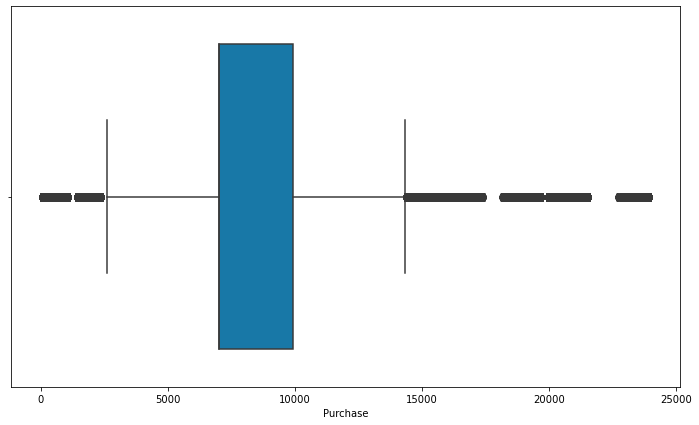

In [38]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Purchase',y=None,data=df,palette='winter')

In [39]:
df.shape

(783667, 10)

In [40]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [41]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\91834\AppData\Local\Temp\ipykernel_16000\2063355665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [42]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,0,1,10,2,0,3,8,8370,0,0
1,0,1,10,2,0,1,6,15200,0,0
2,0,1,10,2,0,12,8,1422,0,0
3,0,1,10,2,0,12,14,1057,0,0
4,1,7,16,4,0,8,8,7969,0,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      783667 non-null  int64 
 1   Age                         783667 non-null  int64 
 2   Occupation                  783667 non-null  int64 
 3   Stay_In_Current_City_Years  783667 non-null  object
 4   Marital_Status              783667 non-null  int64 
 5   Product_Category_1          783667 non-null  int64 
 6   Product_Category_2          783667 non-null  int64 
 7   Purchase                    783667 non-null  int64 
 8   B                           783667 non-null  uint8 
 9   C                           783667 non-null  uint8 
dtypes: int64(7), object(1), uint8(2)
memory usage: 55.3+ MB


In [44]:
##Convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      783667 non-null  int64
 1   Age                         783667 non-null  int64
 2   Occupation                  783667 non-null  int64
 3   Stay_In_Current_City_Years  783667 non-null  int64
 4   Marital_Status              783667 non-null  int64
 5   Product_Category_1          783667 non-null  int64
 6   Product_Category_2          783667 non-null  int64
 7   Purchase                    783667 non-null  int64
 8   B                           783667 non-null  uint8
 9   C                           783667 non-null  uint8
dtypes: int64(8), uint8(2)
memory usage: 55.3 MB


In [45]:
df['B']=df['B'].astype('int64')

In [46]:
df['C']=df['C'].astype('int64')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      783667 non-null  int64
 1   Age                         783667 non-null  int64
 2   Occupation                  783667 non-null  int64
 3   Stay_In_Current_City_Years  783667 non-null  int64
 4   Marital_Status              783667 non-null  int64
 5   Product_Category_1          783667 non-null  int64
 6   Product_Category_2          783667 non-null  int64
 7   Purchase                    783667 non-null  int64
 8   B                           783667 non-null  int64
 9   C                           783667 non-null  int64
dtypes: int64(10)
memory usage: 65.8 MB


In [48]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,0,1,10,2,0,3,8,8370,0,0
1,0,1,10,2,0,1,6,15200,0,0
2,0,1,10,2,0,12,8,1422,0,0
3,0,1,10,2,0,12,14,1057,0,0
4,1,7,16,4,0,8,8,7969,0,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

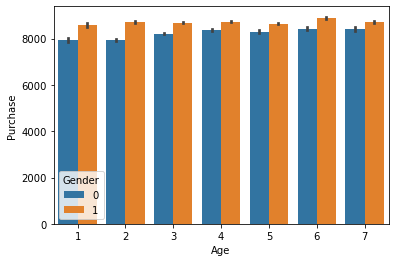

In [49]:
##Visualization
sns.barplot('Age','Purchase',hue='Gender',data=df)

So, Purchasing percentage of purchasing goods of men over women is high

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

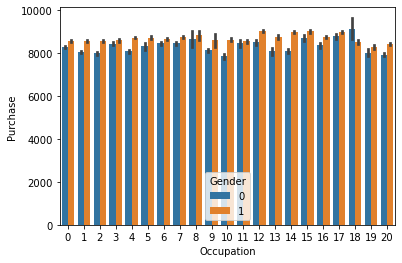

In [50]:
##Visualization of purchase with occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

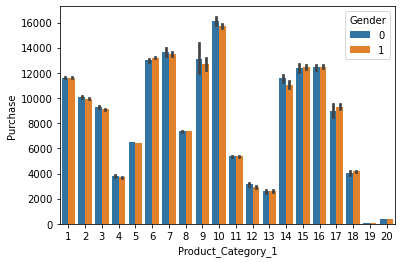

In [51]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

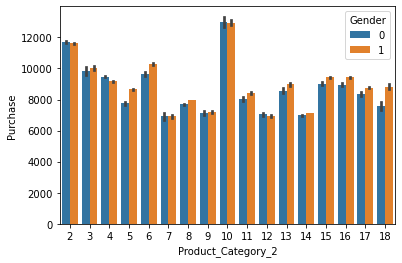

In [52]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

In [53]:
X=df.drop(['Purchase'],axis=1)

In [54]:
X.shape

(783667, 9)

In [55]:
y=df['Purchase']

In [56]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
233594     7011
233595     7011
233596     7011
233597     7011
233598     7011
Name: Purchase, Length: 783667, dtype: int64

In [57]:
y.shape

(783667,)

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [59]:
##feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [60]:
##Train the model

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
logmodel=LinearRegression()
logmodel.fit(X_train,y_train)

LinearRegression()

In [63]:
logmodel.score(X_train,y_train)

0.08332513574663103

In [64]:
logmodel.score(X_test,y_test)

0.08408811660045745

In [65]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=6)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [66]:
print("Train Accuracy :", reg.score(X_train, y_train))
print("Test Accuracy :", reg.score(X_test, y_test))

Train Accuracy : 0.3869438523136618
Test Accuracy : 0.38697828703502635


In [67]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
rf_regressor = RandomForestRegressor(n_estimators = 200,max_depth=11, random_state = 42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, n_estimators=200, random_state=42)

In [81]:
print("Train Accuracy :", rf_regressor.score(X_train, y_train))
print("Test Accuracy :", rf_regressor.score(X_test, y_test))

Train Accuracy : 0.44398656864153374
Test Accuracy : 0.4336101430627749


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      783667 non-null  int64
 1   Age                         783667 non-null  int64
 2   Occupation                  783667 non-null  int64
 3   Stay_In_Current_City_Years  783667 non-null  int64
 4   Marital_Status              783667 non-null  int64
 5   Product_Category_1          783667 non-null  int64
 6   Product_Category_2          783667 non-null  int64
 7   Purchase                    783667 non-null  int64
 8   B                           783667 non-null  int64
 9   C                           783667 non-null  int64
dtypes: int64(10)
memory usage: 65.8 MB


In [71]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(max_depth=9, learning_rate= 0.009 ,n_estimators=900)


In [72]:
xgb_model.fit(X_train,y_train )

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.009, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [73]:
xgb_model.score(X_train,y_train)

0.4549957749451774

In [75]:
from sklearn.metrics import r2_score

y_pred = logmodel.predict(X_test)

r2_score(y_test, y_pred)


0.08408811660045745

In [ ]:
PCA,Cross-Validation